/Users/kuriharayasuaki/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(150, 150,..., padding="same")`
/Users/kuriharayasuaki/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/Users/kuriharayasuaki/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
/Users/kuriharayasuaki/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/Users/kuriharayasuaki/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
activation_7 (Activation)    (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 75, 75, 64)        256       
__________

/Users/kuriharayasuaki/anaconda/lib/python3.6/site-packages/keras/models.py:851: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1125 samples, validate on 375 samples
Epoch 1/3
1125/1125 [==============================] - 100s - loss: 0.8444 - acc: 0.6827 - val_loss: 0.9611 - val_acc: 0.6173
Epoch 2/3
1125/1125 [==============================] - 92s - loss: 0.6498 - acc: 0.7064 - val_loss: 0.9758 - val_acc: 0.6167
Epoch 3/3
1125/1125 [==============================] - 96s - loss: 0.6314 - acc: 0.7296 - val_loss: 0.7737 - val_acc: 0.6220


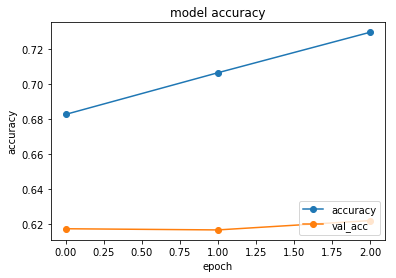

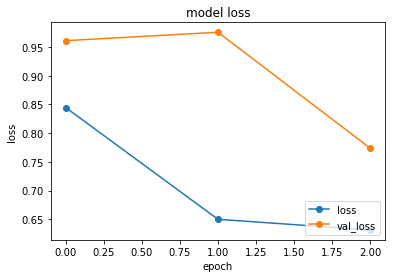

500/500 [==============================] - 15s    
loss= 0.722118168831
accuracy= 0.6475


In [3]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D,normalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import np_utils
import numpy as np
from keras.callbacks import ModelCheckpoint

# 分類対象のカテゴリ
root_dir = "ramen_img100/4obj100.npy"
classes = ["miso", "sio", "tonkotsu", "shouyu"]
nb_classes = len(classes)
image_size = 150

# データをロード --- (※1)
def main():
    X_train, X_test, y_train, y_test = np.load(root_dir)
    # データを正規化する
    X_train = X_train.astype("float") / 256
    X_test  = X_test.astype("float")  / 256
    y_train = np_utils.to_categorical(y_train, nb_classes)
    y_test  = np_utils.to_categorical(y_test, nb_classes)
    # モデルを訓練し評価する
    #print(X_train[1])
    model = model_train(X_train, y_train)
    model_eval(model, X_test, y_test)

# モデルを構築 --- (※2)
def build_model(in_shape):
    model = Sequential()
    model.add(Convolution2D(32, 3, 3,
	border_mode='same',
	input_shape=in_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Convolution2D(64, 3, 3, border_mode='same'))#6行２回
    model.add(Activation('relu'))
    model.add(normalization.BatchNormalization())# add normalization
    model.add(Dropout(0.25))
    model.add(Convolution2D(64, 3, 3))
    model.add(normalization.BatchNormalization())# add normalization
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Convolution2D(64, 3, 3, border_mode='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Convolution2D(64, 3, 3))
    model.add(normalization.BatchNormalization())# add normalization
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(normalization.BatchNormalization())# add normalization
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    model.compile(loss='binary_crossentropy',
	optimizer='rmsprop',
	metrics=['accuracy'])

    model.summary()
    return model

# モデルを訓練する --- (※3)
def model_train(X, y):
    model = build_model(X.shape[1:])
    check = ModelCheckpoint("model.hdf5")
    history = model.fit(X, y,validation_split=0.25, batch_size=32, nb_epoch=3, callbacks=[check])
    # モデルを保存する --- (※4)
    hdf5_file = "ramen_img100/ramen_model.hdf5"
    model.save_weights(hdf5_file)
    plot_history(history)
    return model

# モデルを評価する --- (※5)
def model_eval(model, X, y):
    score = model.evaluate(X, y)
    print('loss=', score[0])
    print('accuracy=', score[1])

import matplotlib.pyplot as plt

def plot_history(history):
    # 精度の履歴をプロット
    plt.plot(history.history['acc'],"o-",label="accuracy")
    plt.plot(history.history['val_acc'],"o-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'],"o-",label="loss",)
    plt.plot(history.history['val_loss'],"o-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')
    plt.show()
# modelに学習させた時の変化の様子をplot

if __name__ == "__main__":
    main()
